# Predicting hear disease using machine learning

This notebook looks into using various python-bsed ml and datascience libraries in an attempt to build a model capable of predicting whether or not someone has heart disease based on their medical attributes.

We'r going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statment,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease ?

## 2.Data

The orgiginal data came from the cleaveland data from the UCI machine learning repository,
there is also a version of it available on Kaggle.

## 3.Evaluation
 > If we can reach 95% accuracy at predicting wheter or not a patient has heart disease during the proof of concept, we'll pursue the project.
 
 ## 4.Features
  **Create data Dictionary **
  * age in years
  * Sex
  * cp chest pain type
  * trestbpsresting bp
  * cholestorol
  * fbs
  * ....

### Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analystis and manipulation

In [3]:
#Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The Goal here is find out more about the data and become a subject matter expert on the dataaset you'r working with.

1. What question(s) are you trying to `solve`?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you 'add', change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

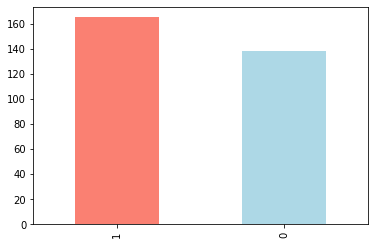

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

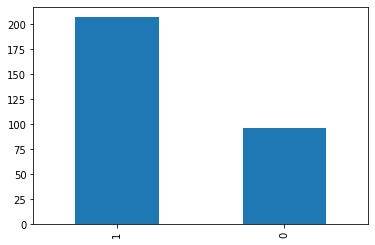

In [13]:
df.sex.value_counts().plot(kind="bar")

In [14]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

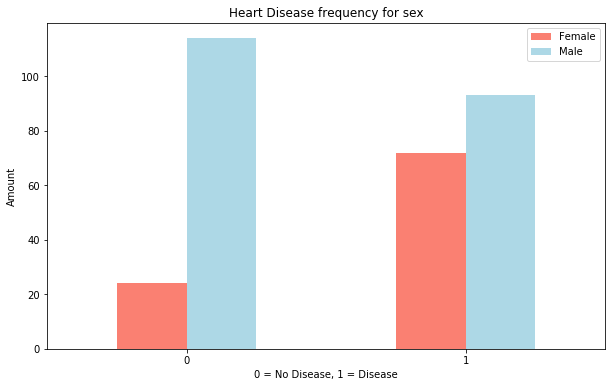

In [18]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                    color=["salmon","lightblue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

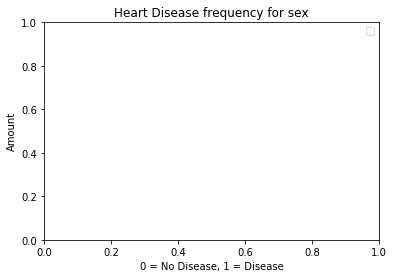

In [17]:
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [19]:
import tensorflow as tf

In [20]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max heart tate for heart disease

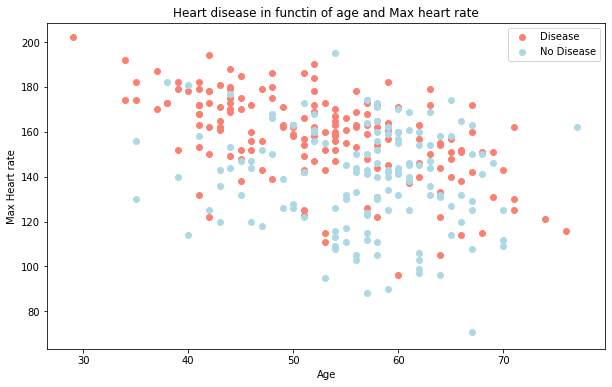

In [25]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],
           c="salmon")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

plt.title("Heart disease in functin of age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","No Disease"])

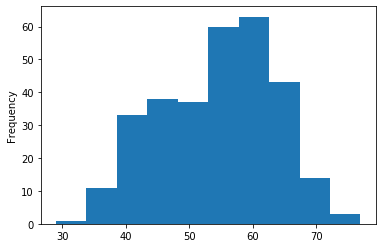

In [26]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

## Heart Disease Frequency per Chest Pain Type

In [27]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

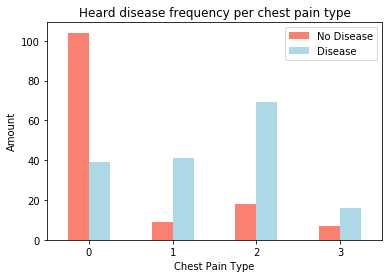

In [28]:
pd.crosstab(df.cp, df.target).plot(kind="bar",color=["salmon","lightblue"])
plt.title("Heard disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

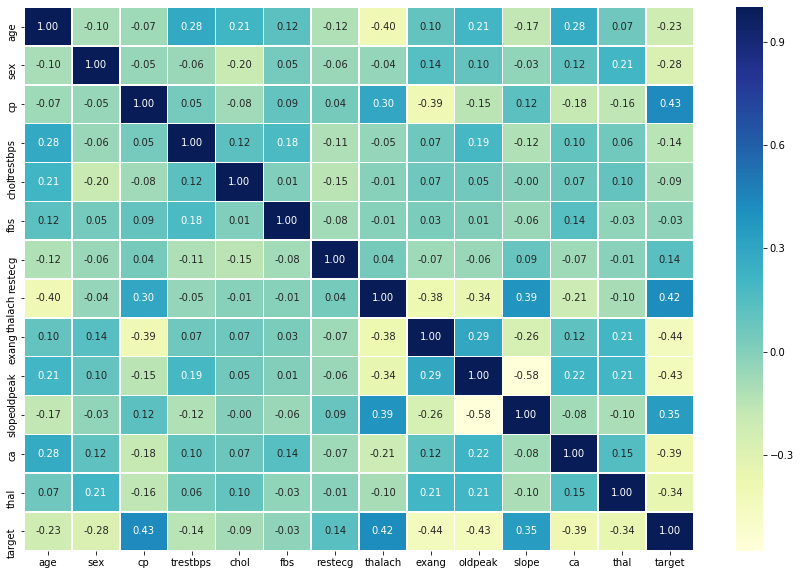

In [31]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,
                 fmt=".2f",cmap="YlGnBu")
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [32]:
# Split data into X and Y

In [33]:
X = df.drop("target",axis=1)
Y = df["target"]

In [34]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [36]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [39]:
x_train.length

AttributeError: 'DataFrame' object has no attribute 'length'

In [40]:
x_train.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 89 to 179
Data columns (total 13 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


 We got our data split, time to build a fin model

 We'r going to try 3 different models:
    1. `Logistic Regression`
    2. K-Nearest Neighbours classifier
    3. Random Forest Classifier

In [42]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models, x_train, x_test,y_train,y_test):
    """
    Fits and evaluatses given machine learning models.
    models: a dict of different sklearn ML models
    x_train:training data
    x_test: testing data
    y_train: training labels
    y_test : test label
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #Loop through modesl
    for name, model in models.items():
        #Fit model to data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores    
        
    
    

In [44]:
scores = fit_and_score(models = models,
                      x_train=x_train,
                      x_test=x_test,
                      y_train=y_train,
                      y_test=y_test)

/home/ghost/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
scores

{'Logistic Regression': 0.7377049180327869,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.7049180327868853}

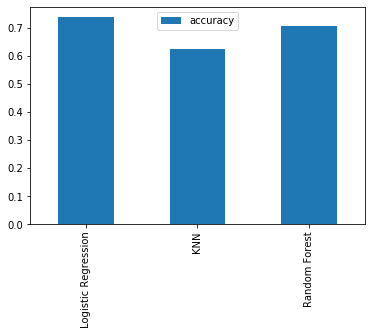

In [47]:
comparison = pd.DataFrame(scores,index=["accuracy"])
comparison.T.plot.bar()